In [1]:
# multivariate output multi-step 1d cnn example
import pandas as pd
from numpy import array
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import LSTM
from keras.layers import Flatten
from keras.layers.convolutional import Conv1D
from keras.layers.convolutional import MaxPooling1D
from keras.layers import RepeatVector
from keras.layers import TimeDistributed
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_squared_error
import matplotlib.pyplot as plt
from math import sqrt
import numpy as np
from keras.layers import Dropout

Using TensorFlow backend.


In [2]:
# split a multivariate sequence into samples
def split_sequences(sequences, n_steps_in, n_steps_out):
	X, y = list(), list()
	for i in range(len(sequences)):
		# find the end of this pattern
		end_ix = i + n_steps_in
		out_end_ix = end_ix + n_steps_out
		# check if we are beyond the dataset
		if out_end_ix > len(sequences):
			break
		# gather input and output parts of the pattern
		seq_x, seq_y = sequences[i:end_ix, :], sequences[end_ix:out_end_ix, :]
		X.append(seq_x)
		y.append(seq_y)
	return array(X), array(y)

In [3]:
dataset = pd.read_csv('bor2hci.csv', header=0, index_col=0)
#dataset=dataset.del((:,0))
dataset=dataset.fillna(0)
#dataset = dataset.drop((c for c in dataset.columns[-6:]), axis=1)
values = dataset.values
values = values.astype('float32')
# normalize features
scaler = MinMaxScaler(feature_range=(0,1))
scaled = scaler.fit_transform(values)
# choose a number of time steps
n_steps_in, n_steps_out = 12, 3
# convert into input/output
X_train, y_train = split_sequences(scaled[:-12,:], n_steps_in, n_steps_out)
# flatten output

n_output = y_train.shape[1] * y_train.shape[2]
y_train = y_train.reshape((y_train.shape[0], n_output))
# the dataset knows the number of features, e.g. 2
n_features = X_train.shape[2]
test = scaled[-39:,:]
X_test, y_test = split_sequences(test, n_steps_in, n_steps_out)
#X_test=scaled[-15:-3,:]
#y_test=scaled[-3:,:]
#X_test = X_test.reshape((1, n_steps_in, n_features))
#y_test = y_test.reshape((1, n_steps_out, n_features))
y_test = y_test.reshape((y_test.shape[0], n_output))


In [4]:
y_test.shape

(25, 24)

Train on 249 samples, validate on 25 samples
Epoch 1/500
 - 21s - loss: 0.3702 - val_loss: 0.2899
Epoch 2/500
 - 0s - loss: 0.3528 - val_loss: 0.2781
Epoch 3/500
 - 0s - loss: 0.3278 - val_loss: 0.2567
Epoch 4/500
 - 0s - loss: 0.2905 - val_loss: 0.2199
Epoch 5/500
 - 0s - loss: 0.2509 - val_loss: 0.2107
Epoch 6/500
 - 0s - loss: 0.2355 - val_loss: 0.2104
Epoch 7/500
 - 0s - loss: 0.2284 - val_loss: 0.2191
Epoch 8/500
 - 0s - loss: 0.2216 - val_loss: 0.2282
Epoch 9/500
 - 0s - loss: 0.2187 - val_loss: 0.2383
Epoch 10/500
 - 1s - loss: 0.2162 - val_loss: 0.2343
Epoch 11/500
 - 1s - loss: 0.2159 - val_loss: 0.2404
Epoch 12/500
 - 0s - loss: 0.2153 - val_loss: 0.2361
Epoch 13/500
 - 0s - loss: 0.2152 - val_loss: 0.2409
Epoch 14/500
 - 0s - loss: 0.2145 - val_loss: 0.2368
Epoch 15/500
 - 0s - loss: 0.2146 - val_loss: 0.2385
Epoch 16/500
 - 1s - loss: 0.2145 - val_loss: 0.2379
Epoch 17/500
 - 0s - loss: 0.2145 - val_loss: 0.2384
Epoch 18/500
 - 0s - loss: 0.2143 - val_loss: 0.2382
Epoch 19/

Epoch 154/500
 - 0s - loss: 0.2119 - val_loss: 0.2421
Epoch 155/500
 - 0s - loss: 0.2124 - val_loss: 0.2416
Epoch 156/500
 - 1s - loss: 0.2120 - val_loss: 0.2445
Epoch 157/500
 - 0s - loss: 0.2118 - val_loss: 0.2425
Epoch 158/500
 - 0s - loss: 0.2123 - val_loss: 0.2424
Epoch 159/500
 - 0s - loss: 0.2122 - val_loss: 0.2417
Epoch 160/500
 - 0s - loss: 0.2117 - val_loss: 0.2435
Epoch 161/500
 - 0s - loss: 0.2122 - val_loss: 0.2413
Epoch 162/500
 - 0s - loss: 0.2123 - val_loss: 0.2435
Epoch 163/500
 - 0s - loss: 0.2120 - val_loss: 0.2431
Epoch 164/500
 - 0s - loss: 0.2117 - val_loss: 0.2420
Epoch 165/500
 - 0s - loss: 0.2122 - val_loss: 0.2421
Epoch 166/500
 - 0s - loss: 0.2115 - val_loss: 0.2428
Epoch 167/500
 - 1s - loss: 0.2122 - val_loss: 0.2421
Epoch 168/500
 - 1s - loss: 0.2122 - val_loss: 0.2423
Epoch 169/500
 - 0s - loss: 0.2120 - val_loss: 0.2447
Epoch 170/500
 - 0s - loss: 0.2120 - val_loss: 0.2417
Epoch 171/500
 - 0s - loss: 0.2120 - val_loss: 0.2417
Epoch 172/500
 - 1s - loss: 

Epoch 306/500
 - 0s - loss: 0.2117 - val_loss: 0.2445
Epoch 307/500
 - 0s - loss: 0.2113 - val_loss: 0.2431
Epoch 308/500
 - 0s - loss: 0.2119 - val_loss: 0.2439
Epoch 309/500
 - 0s - loss: 0.2112 - val_loss: 0.2432
Epoch 310/500
 - 0s - loss: 0.2115 - val_loss: 0.2442
Epoch 311/500
 - 1s - loss: 0.2118 - val_loss: 0.2434
Epoch 312/500
 - 0s - loss: 0.2116 - val_loss: 0.2438
Epoch 313/500
 - 1s - loss: 0.2117 - val_loss: 0.2432
Epoch 314/500
 - 0s - loss: 0.2122 - val_loss: 0.2429
Epoch 315/500
 - 0s - loss: 0.2115 - val_loss: 0.2441
Epoch 316/500
 - 0s - loss: 0.2123 - val_loss: 0.2439
Epoch 317/500
 - 1s - loss: 0.2111 - val_loss: 0.2440
Epoch 318/500
 - 0s - loss: 0.2117 - val_loss: 0.2441
Epoch 319/500
 - 0s - loss: 0.2112 - val_loss: 0.2438
Epoch 320/500
 - 0s - loss: 0.2116 - val_loss: 0.2444
Epoch 321/500
 - 0s - loss: 0.2112 - val_loss: 0.2436
Epoch 322/500
 - 0s - loss: 0.2116 - val_loss: 0.2435
Epoch 323/500
 - 0s - loss: 0.2121 - val_loss: 0.2430
Epoch 324/500
 - 0s - loss: 

Epoch 458/500
 - 0s - loss: 0.2113 - val_loss: 0.2438
Epoch 459/500
 - 0s - loss: 0.2124 - val_loss: 0.2432
Epoch 460/500
 - 0s - loss: 0.2116 - val_loss: 0.2439
Epoch 461/500
 - 0s - loss: 0.2122 - val_loss: 0.2433
Epoch 462/500
 - 0s - loss: 0.2116 - val_loss: 0.2438
Epoch 463/500
 - 0s - loss: 0.2121 - val_loss: 0.2435
Epoch 464/500
 - 1s - loss: 0.2117 - val_loss: 0.2438
Epoch 465/500
 - 0s - loss: 0.2125 - val_loss: 0.2432
Epoch 466/500
 - 0s - loss: 0.2112 - val_loss: 0.2441
Epoch 467/500
 - 0s - loss: 0.2125 - val_loss: 0.2433
Epoch 468/500
 - 0s - loss: 0.2112 - val_loss: 0.2442
Epoch 469/500
 - 0s - loss: 0.2125 - val_loss: 0.2432
Epoch 470/500
 - 1s - loss: 0.2119 - val_loss: 0.2437
Epoch 471/500
 - 0s - loss: 0.2118 - val_loss: 0.2432
Epoch 472/500
 - 0s - loss: 0.2118 - val_loss: 0.2436
Epoch 473/500
 - 1s - loss: 0.2117 - val_loss: 0.2434
Epoch 474/500
 - 1s - loss: 0.2121 - val_loss: 0.2435
Epoch 475/500
 - 0s - loss: 0.2122 - val_loss: 0.2434
Epoch 476/500
 - 0s - loss: 

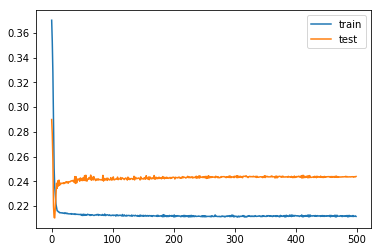

In [5]:
# define model
model = Sequential()
model.add(LSTM(150, activation='softmax', input_shape=(n_steps_in, n_features)))
model.add(Dropout(0.02))
model.add(Dense(120,activation='relu', input_shape=(n_steps_in, n_features)))
model.add(Dense(160,activation='relu'))
model.add(Dense(n_output,activation='relu'))
model.compile(optimizer='adadelta', loss='mae')
history = model.fit(X_train,y_train,epochs=500,validation_data=(X_test, y_test),verbose=2,shuffle=False)
plt.plot(history.history['loss'], label='train')
plt.plot(history.history['val_loss'], label='test')
plt.legend()
plt.show()

In [6]:
#X_test = X_test.reshape((1, n_steps_in, n_features))
yhat = model.predict(X_test)
n_yhat = yhat.reshape((y_test.shape[0]* n_steps_out,n_features))
inv_yhat = scaler.inverse_transform(n_yhat)
inv_yhat = inv_yhat[:,4:7]
y_test = y_test.reshape((y_test.shape[0]* n_steps_out,n_features))
inv_y = scaler.inverse_transform(y_test)
inv_y = inv_y[:,4:7]
# calculate RMSE
rmse = sqrt(mean_squared_error(inv_y, inv_yhat))
print('Test RMSE: %.3f' % rmse)

Test RMSE: 386.160


In [7]:
i=0
ninhat=[]
x_input = scaled[-12:,:] 
x_input = x_input.reshape((1, n_steps_in, n_features))
nx_input = x_input
while i < 8:
    nyhat = model.predict(nx_input, verbose=0)
    #print(nyhat)
    nx_input = nx_input.reshape((n_steps_in, n_features))
    nyhat = nyhat.reshape((n_steps_out, n_features))
    nx_input = np.append(nx_input[3:,:],nyhat)
    nx_input = nx_input.reshape((1, n_steps_in, n_features))
    ninhat = np.append(ninhat,nyhat)
    i = i+1

In [8]:
print(ninhat.shape)

(192,)


In [9]:
ninhat = ninhat.reshape((24, n_features))
ninhat = scaler.inverse_transform(ninhat)

In [10]:
print(ninhat.shape)
print(ninhat[:,4:7])

(24, 8)
[[2.49541226e+02 6.41685730e-02 7.43430837e+02]
 [2.53594965e+02 0.00000000e+00 7.44392415e+02]
 [2.56483437e+02 7.94725199e-02 7.48067401e+02]
 [2.49674528e+02 6.42208749e-02 7.43749431e+02]
 [2.53781347e+02 0.00000000e+00 7.44744569e+02]
 [2.56586697e+02 7.95118557e-02 7.48384118e+02]
 [2.49674651e+02 6.42210154e-02 7.43749983e+02]
 [2.53781388e+02 0.00000000e+00 7.44745121e+02]
 [2.56587146e+02 7.95117854e-02 7.48384781e+02]
 [2.49674692e+02 6.42210701e-02 7.43750093e+02]
 [2.53781408e+02 0.00000000e+00 7.44745176e+02]
 [2.56587289e+02 7.95117464e-02 7.48385001e+02]
 [2.49674692e+02 6.42210857e-02 7.43750204e+02]
 [2.53781408e+02 0.00000000e+00 7.44745232e+02]
 [2.56587371e+02 7.95117464e-02 7.48385057e+02]
 [2.49674692e+02 6.42210857e-02 7.43750204e+02]
 [2.53781408e+02 0.00000000e+00 7.44745232e+02]
 [2.56587371e+02 7.95117464e-02 7.48385057e+02]
 [2.49674692e+02 6.42210857e-02 7.43750204e+02]
 [2.53781408e+02 0.00000000e+00 7.44745232e+02]
 [2.56587371e+02 7.95117464e-02 

In [11]:
print(nx_input.shape)
print(nyhat.shape)

(1, 12, 8)
(3, 8)


In [12]:
nin_yhat = nx_input.reshape((n_steps_in, n_features))
ninv_yhat = scaler.inverse_transform(nin_yhat)
print(ninv_yhat.shape)

(12, 8)


In [13]:
print(ninv_yhat[:,4:7])

[[2.4967470e+02 6.4221084e-02 7.4375018e+02]
 [2.5378140e+02 0.0000000e+00 7.4474524e+02]
 [2.5658737e+02 7.9511747e-02 7.4838507e+02]
 [2.4967470e+02 6.4221084e-02 7.4375018e+02]
 [2.5378140e+02 0.0000000e+00 7.4474524e+02]
 [2.5658737e+02 7.9511747e-02 7.4838507e+02]
 [2.4967470e+02 6.4221084e-02 7.4375018e+02]
 [2.5378140e+02 0.0000000e+00 7.4474524e+02]
 [2.5658737e+02 7.9511747e-02 7.4838507e+02]
 [2.4967470e+02 6.4221084e-02 7.4375018e+02]
 [2.5378140e+02 0.0000000e+00 7.4474524e+02]
 [2.5658737e+02 7.9511747e-02 7.4838507e+02]]


In [14]:
#print(nx_input[0,2] ,nx_input[0,5])

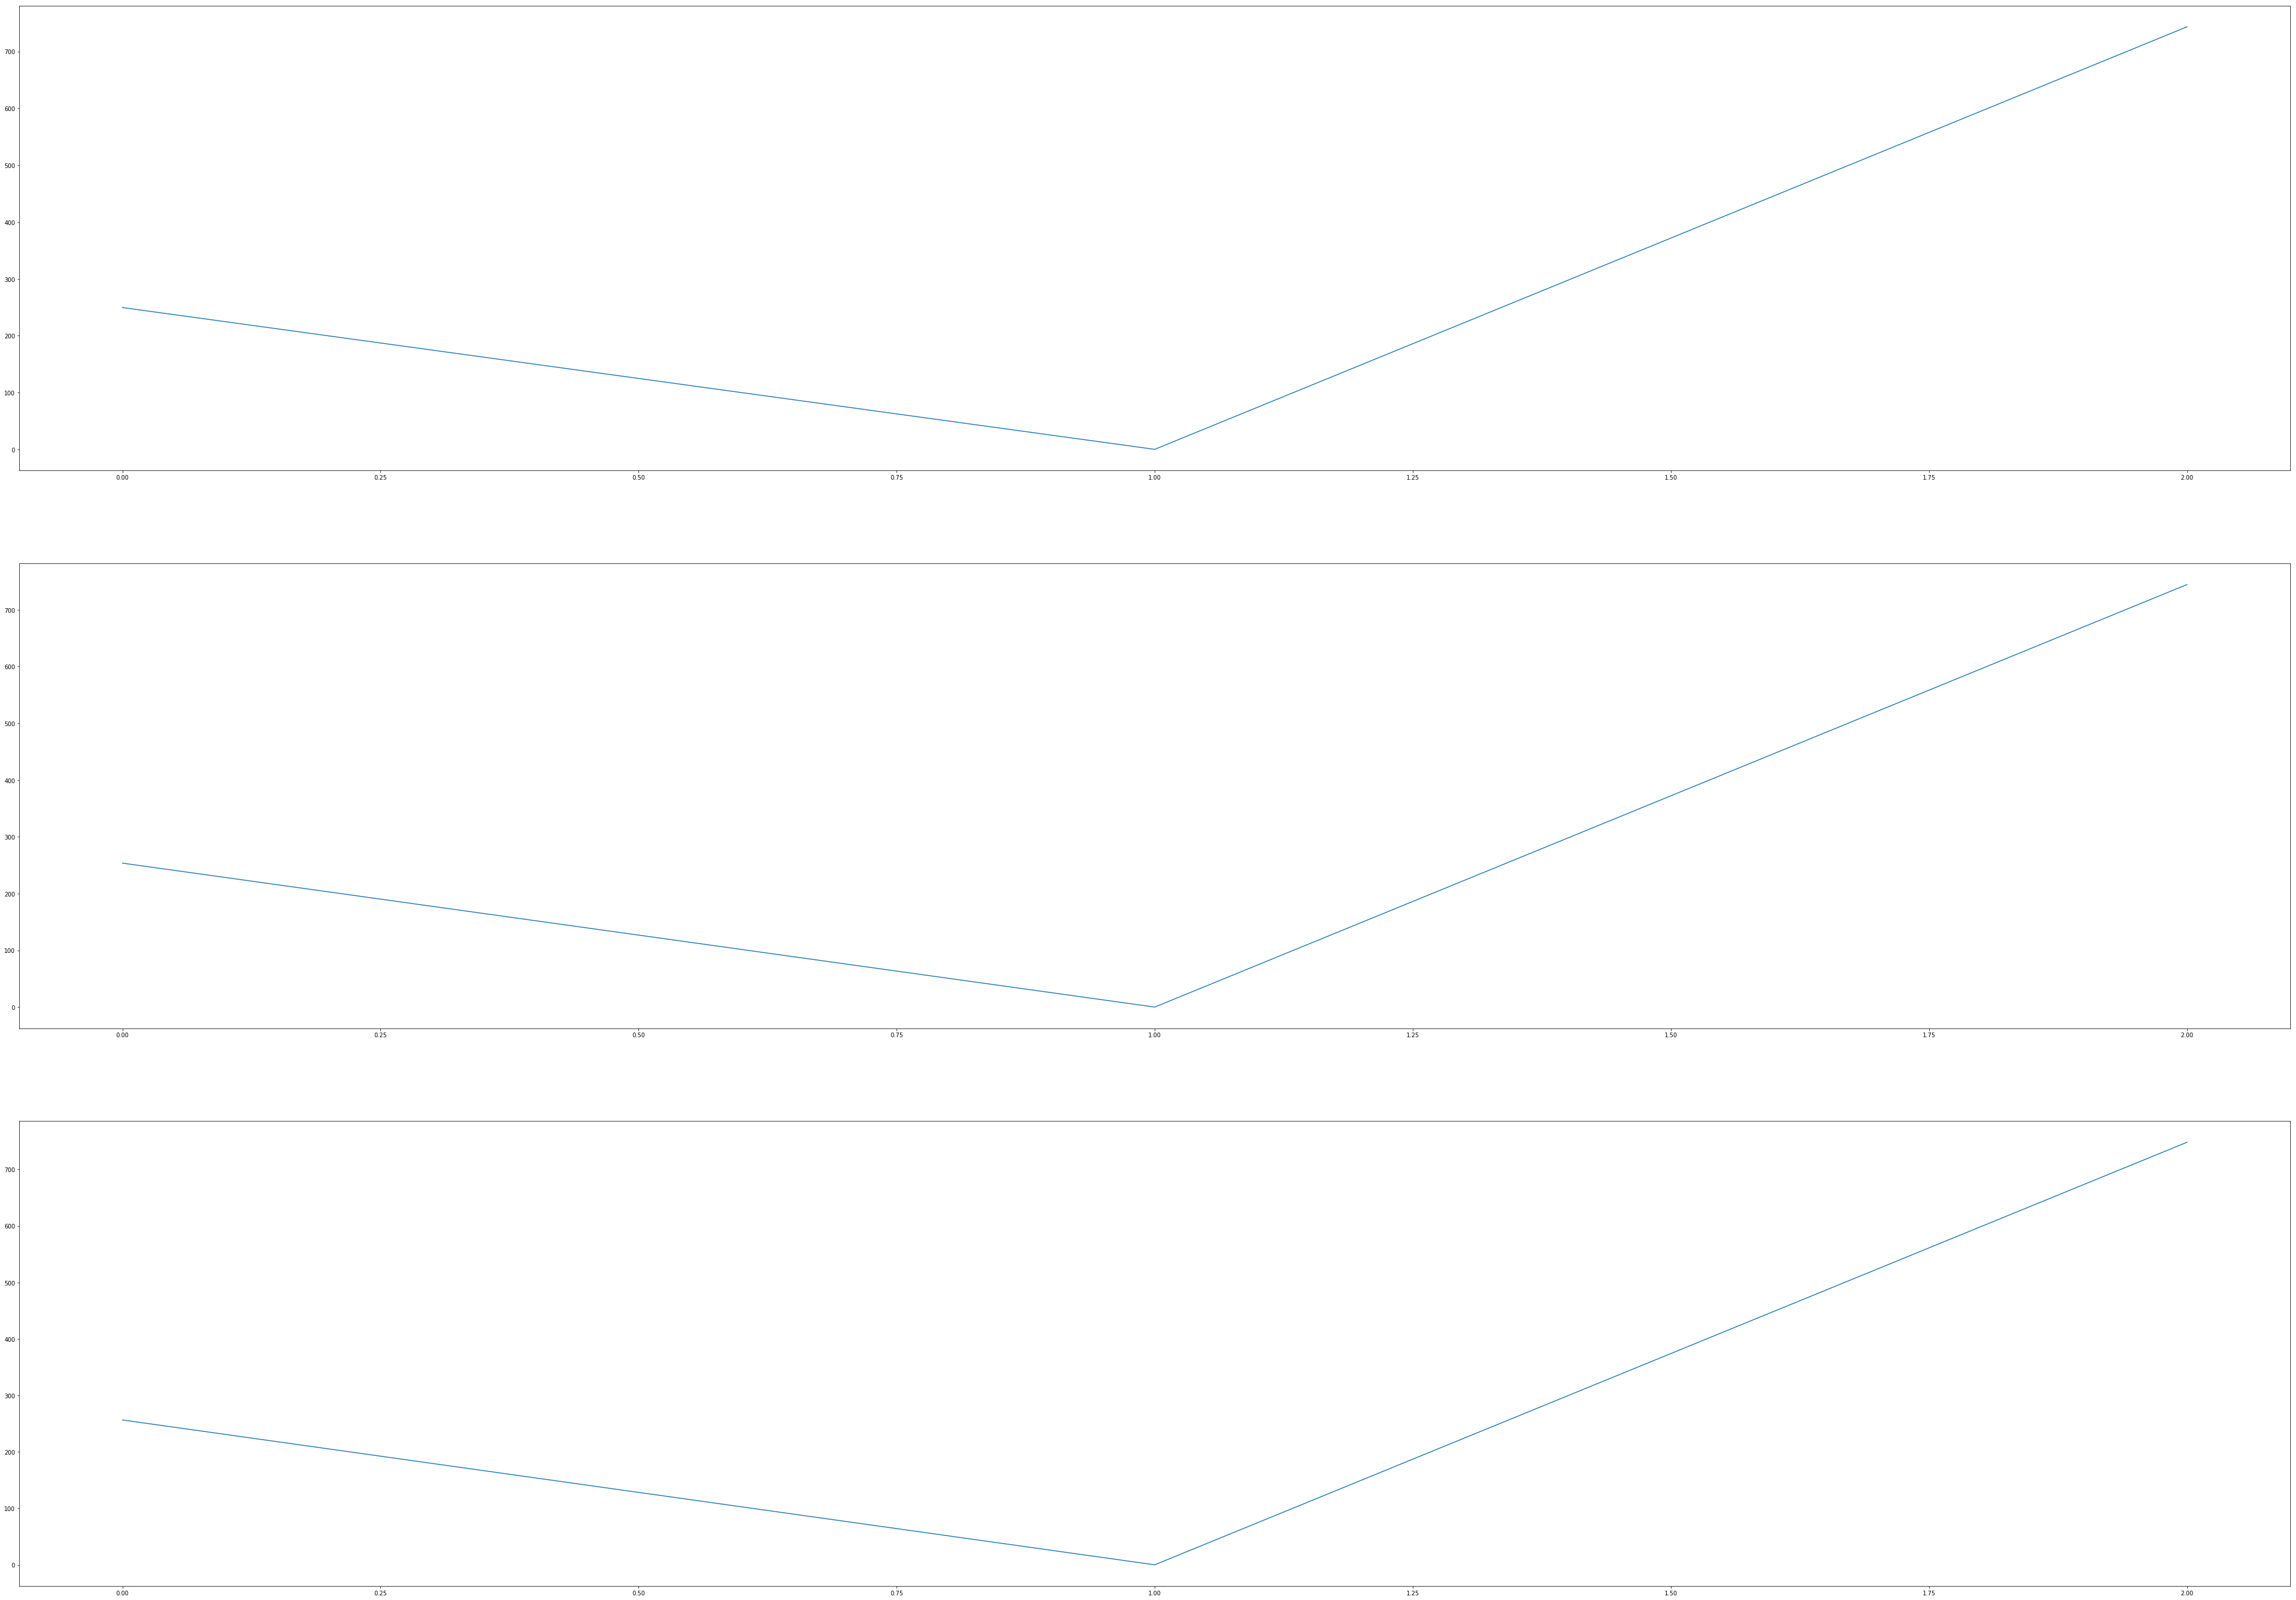

In [15]:
groups = [0,1,2]
i = 1
# plot each column
plt.figure(figsize=(70,50))
for group in groups:
	plt.subplot(len(groups), 1, i)
	plt.plot(ninhat[group, 4:7])
	#plt.title(dataset.columns[group], y=0.5, loc='right')
	i += 1
plt.show()

In [16]:
new = dataset

In [17]:
new.shape

(275, 8)

In [18]:
new.columns

Index(['Monthlyprod.Thp', 'Monthlyprod.Bean', 'Monthlyprod.Days',
       'Daily Gas prod. Mscfd', 'GOR STB/SCF', 'WCUT Fraction',
       'Daily Prod. Oil', 'Water daily '],
      dtype='object')

In [19]:
new.index

Index(['01/10/91', '01/11/91', '01/12/91', '01/01/92', '01/02/92', '01/03/92',
       '01/04/92', '01/05/92', '01/06/92', '01/07/92',
       ...
       '01/03/14', '01/04/14', '01/05/14', '01/06/14', '01/07/14', '01/08/14',
       '01/09/14', '01/10/14', '01/11/14', '01/12/14'],
      dtype='object', name='Date', length=275)

In [20]:
nin=new.index[-1]
print(nin)

01/12/14


In [21]:
newxhat= pd.DataFrame(ninhat,columns=[c for c in new.columns] )

In [22]:
newxhat.shape

(24, 8)

In [23]:
new=new.append(newxhat)
new.shape

(299, 8)

In [24]:
new.head(4)

,Monthlyprod.Thp,Monthlyprod.Bean,Monthlyprod.Days,Daily Gas prod. Mscfd,GOR STB/SCF,WCUT Fraction,Daily Prod. Oil,Water daily
01/10/91,1012.0,16.0,26.0,97.269231,502.084574,0.0,193.730769,0.0
01/11/91,1027.0,16.0,29.5,163.762712,1075.706969,0.0,152.237288,0.0
01/12/91,1050.0,20.0,30.7,190.977199,258.863526,0.0,737.752443,0.0
01/01/92,950.0,20.0,31.0,241.193548,233.291732,0.0,1033.870968,0.0


In [26]:
newbori = new.to_csv('newbori3b.csv')